# Getting our data ready

In [2]:
import os
from glob import glob

import torch
from monai.transforms import(
    Compose,
    LoadImaged,
    EnsureChannelFirstd,
    Spacingd,
    ScaleIntensityRanged,
    CropForegroundd,
    Resized,
    ToTensord
)

from monai.data import Dataset, DataLoader
from monai.utils import first

from matplotlib import pyplot as plt

In [3]:
data_dir = r"E:\LumenResearchDataBase\Task07_Pancreas\Task07_Pancreas"

In [4]:
train_images = sorted(glob(os.path.join(data_dir, "imagesTr", "*nii.gz")))
labeled_images = sorted(glob(os.path.join(data_dir, "labelsTr", "*nii.gz")))

# Valiation data

train_files = [{"image":image_name, "label":label_name} for image_name, label_name in zip(train_images, labeled_images)]

train_files

[{'image': 'E:\\LumenResearchDataBase\\Task07_Pancreas\\Task07_Pancreas\\imagesTr\\pancreas_001.nii.gz',
  'label': 'E:\\LumenResearchDataBase\\Task07_Pancreas\\Task07_Pancreas\\labelsTr\\pancreas_001.nii.gz'},
 {'image': 'E:\\LumenResearchDataBase\\Task07_Pancreas\\Task07_Pancreas\\imagesTr\\pancreas_004.nii.gz',
  'label': 'E:\\LumenResearchDataBase\\Task07_Pancreas\\Task07_Pancreas\\labelsTr\\pancreas_004.nii.gz'},
 {'image': 'E:\\LumenResearchDataBase\\Task07_Pancreas\\Task07_Pancreas\\imagesTr\\pancreas_005.nii.gz',
  'label': 'E:\\LumenResearchDataBase\\Task07_Pancreas\\Task07_Pancreas\\labelsTr\\pancreas_005.nii.gz'},
 {'image': 'E:\\LumenResearchDataBase\\Task07_Pancreas\\Task07_Pancreas\\imagesTr\\pancreas_006.nii.gz',
  'label': 'E:\\LumenResearchDataBase\\Task07_Pancreas\\Task07_Pancreas\\labelsTr\\pancreas_006.nii.gz'},
 {'image': 'E:\\LumenResearchDataBase\\Task07_Pancreas\\Task07_Pancreas\\imagesTr\\pancreas_010.nii.gz',
  'label': 'E:\\LumenResearchDataBase\\Task07_Pancr

In [5]:
# Load the image
# Add channl: batch
# zoom in the image, and make the pixel weight more, [col, row, depth]
# Change the intensity range of the image (change the contrast , normalize the value between 0.0 to 1.0 (not o and 1))
# Crop only the forground (you want to  crop both image and label, source_key: which image it should crop based on)
# Size the image because patients might have different size of image. Note: do it after the crop. Spatial_size[W, H, Slice]
# Convert to tensor

original_transform = Compose(
    [
        LoadImaged(keys=['image', 'label']),
        EnsureChannelFirstd(['image', 'label']),
        ToTensord(keys=['image', 'label'])
    ]
)


train_transform = Compose(
    [
        LoadImaged(keys=['image', 'label']),
        EnsureChannelFirstd(['image', 'label']),
        Spacingd(keys=['image', 'label'], pixdim=(1.5, 1.5, 2)),
        ScaleIntensityRanged(keys='image', a_min=-200, a_max=200, b_min=0.0, b_max=1.0, clip=True),
        CropForegroundd(keys=['image', 'label'], source_key = 'image'),
        
        # Poteintial Error: The number of slice must be consistent
        Resized(keys=['image', 'label'], spatial_size=[128, 128, 128]),
        ToTensord(keys=['image', 'label'])
    ]
)

D:\Anaconda\envs\lumen\lib\site-packages\monai\utils\deprecate_utils.py:321: FutureWarning: monai.transforms.croppad.dictionary CropForegroundd.__init__:allow_smaller: Current default value of argument `allow_smaller=True` has been deprecated since version 1.2. It will be changed to `allow_smaller=False` in version 1.5.
  warn_deprecated(argname, msg, warning_category)


In [6]:
train_ds = Dataset(data=train_files, transform=train_transform)
train_loader = DataLoader(train_ds, batch_size=1)

original_ds = Dataset(data=train_files, transform=original_transform)
oringal_loader = DataLoader(original_ds, batch_size=1)

In [7]:
test_patient = first(train_loader)

oringal_patient = first(oringal_loader)

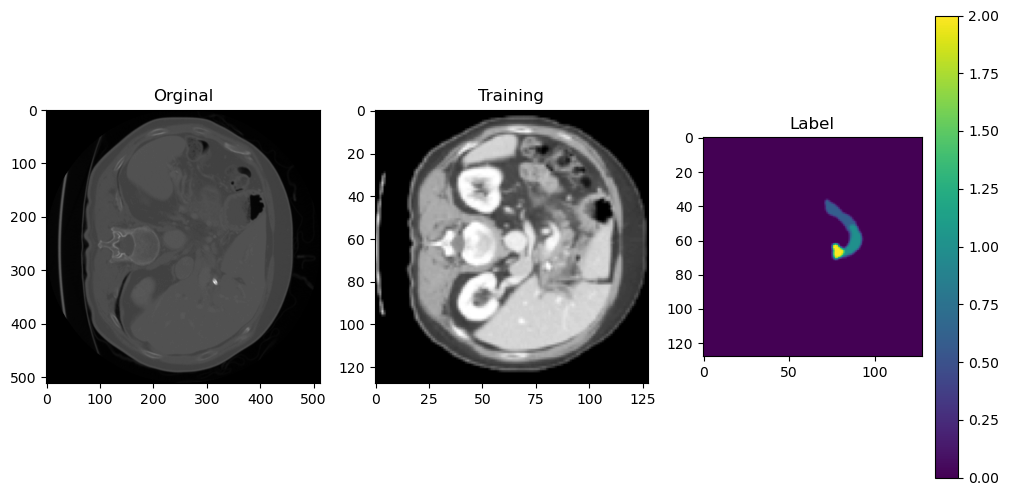

In [8]:
plt.figure('test', (12,6))


plt.subplot(1, 3, 1)
plt.title('Orginal')
plt.imshow(oringal_patient['image'][0, 0, :, :, 60], cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Training')

# test_patient['image'][batch,channel,width,hight,slice]
plt.imshow(test_patient['image'][0, 0, :, :, 60], cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Label')
plt.imshow(test_patient['label'][0, 0, :, :, 60])
plt.colorbar()